Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [1]:
%matplotlib inline

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import thinkstats2
import brfss

df = brfss.ReadBrfss()
df = df.dropna(subset=['wtkg2', 'htm3'])
df['logwt'] = np.log10(df.wtkg2)

In [3]:
heights = df.htm3
log_weights = df.logwt

inter, slope = thinkstats2.LeastSquares(heights, log_weights)
print 'Linear least squares fit: log(weight) = {}*height + {}'.format(slope, inter)

Linear least squares fit: log(weight) = 0.00528145416942*height + 0.993080416394


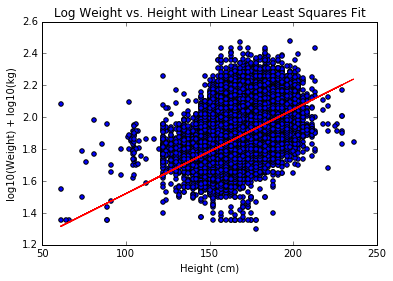

In [4]:
plt.scatter(heights, log_weights)
plt.plot(heights, slope*heights + inter, 'r')
plt.xlabel('Height (cm)')
plt.ylabel('log10(Weight) + log10(kg)')
plt.title('Log Weight vs. Height with Linear Least Squares Fit')

I have no idea what the best way to present this information is with a log-transformed variable.  I tried plotting it first, but that does not seem particularly useful.  I guess I will look at the root mean squared error (RMSE) and coefficient of determination (R$^2$), though I am not sure if they are useful for log-transformed variables.

In [5]:
res = thinkstats2.Residuals(heights, log_weights, inter, slope)

print 'RMSE:'
print 'Without knowing height: ', thinkstats2.Std(log_weights)
print 'With knowing height: ', thinkstats2.Std(res)
print
print 'R-squared: ', thinkstats2.CoefDetermination(log_weights, res)

RMSE:
Without knowing height:  0.1032072503
With knowing height:  0.0874077708042

R-squared:  0.282734943119


Using height data, the RMSE improved by a tiny bit, but this seems rather insignificant.  The R$^2$ value is 0.28, meaning that 28% of the variance in the log weight is accounted for by height.  This does not seem very significant either, but I don't really have an intuition for what a significant R$^2$ value would be, especially with a log-transformed variable involved.

## Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

Why look at percentiles?  They don't seem particularly useful to me, but I'm also not totally sure what they can show you.

Are there standard numbers for what is significant or not for R$^2$ or anything else?  I feel like I don't have a good intuition for when something is significant or not based on these numbers.

What _is_ a good way to present variables when logs are involved?

## Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

## Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.